##Machine Learning Final Project
Team: Ameh Ojonukpemi & Isaac Pefaur


In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Language Detection.csv")

In [3]:
df1 = df.loc[df['Language'] == 'Greek']

In [4]:
df1

,Text,Language
5629,Δεν υπάρχει αυτή τη στιγμή λήμμα με αυτόν τον...,Greek
5630,Αν περιμένατε να βρίσκεται εδώ μια σελίδα και ...,Greek
5631,(Δείτε την γρήγορη διαγραφή σελίδων για πιθανο...,Greek
5632,Μπορείτε να δοκιμάστε την λειτουργία εκκαθάρισ...,Greek
5633,"Η Βικιπαίδεια (αγγλικά: Wikipedia, γουικιπίντι...",Greek
...,...,...
5989,"τι ήρθε το λάθος σου, ας σου δώσουμε κάτι ωραί...",Greek
5990,Η ναρκίσσα άλλαξε τους τρόπους της που αγωνίστ...,Greek
5991,"πως' Ο ναρκισσισμός, τώρα η Μαρία, τους είπε ό...",Greek
5992,Μήπως υποθέτω ότι δεν θα ήθελε άλλο χρυσό ψωμί...,Greek


In [5]:
df

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


In [6]:
y = df['Language']
label = LabelEncoder()
y = label.fit_transform(y)

In [7]:
y

array([3, 3, 3, ..., 9, 9, 9])

In [8]:
len(y)

10337

In [9]:
X = []
x = df['Text']
for text in x:
  text = re.sub(r'[!@#$(),\n"%^*?\:;~`0-9]', ' ', text)
  text = re.sub(r'[[]', ' ', text)
  text = re.sub(r'[]]', ' ', text)
  text = text.lower()
  X.append(text)

<ipython-input-9-617a13444707>:5: FutureWarning: Possible nested set at position 1
  text = re.sub(r'[[]', ' ', text)


In [ ]:
X

In [ ]:
len(x)

10337

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(X).toarray()

In [12]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [16]:
x_train.shape

(8269, 39404)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [ ]:
# prediction 
y_pred = model.predict(x_test)
y_pred

array([ 5,  3, 13, ...,  3, 12, 10])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [ ]:
print("Accuracy is :",ac)

Accuracy is : 0.9743713733075435


In [ ]:
# classification report
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       104
           1       0.98      0.93      0.95        90
           2       1.00      0.97      0.98        89
           3       0.88      1.00      0.93       261
           4       0.98      0.98      0.98       191
           5       1.00      0.99      0.99        95
           6       1.00      0.97      0.99        72
           7       1.00      0.93      0.97        15
           8       0.99      0.96      0.97       158
           9       1.00      0.97      0.99        71
          10       1.00      0.99      1.00       129
          11       0.99      0.98      0.98       124
          12       0.99      0.99      0.99       140
          13       0.98      0.98      0.98       193
          14       0.97      0.97      0.97       151
          15       1.00      1.00      1.00        83
          16       1.00      0.90      0.95       102

    accuracy              

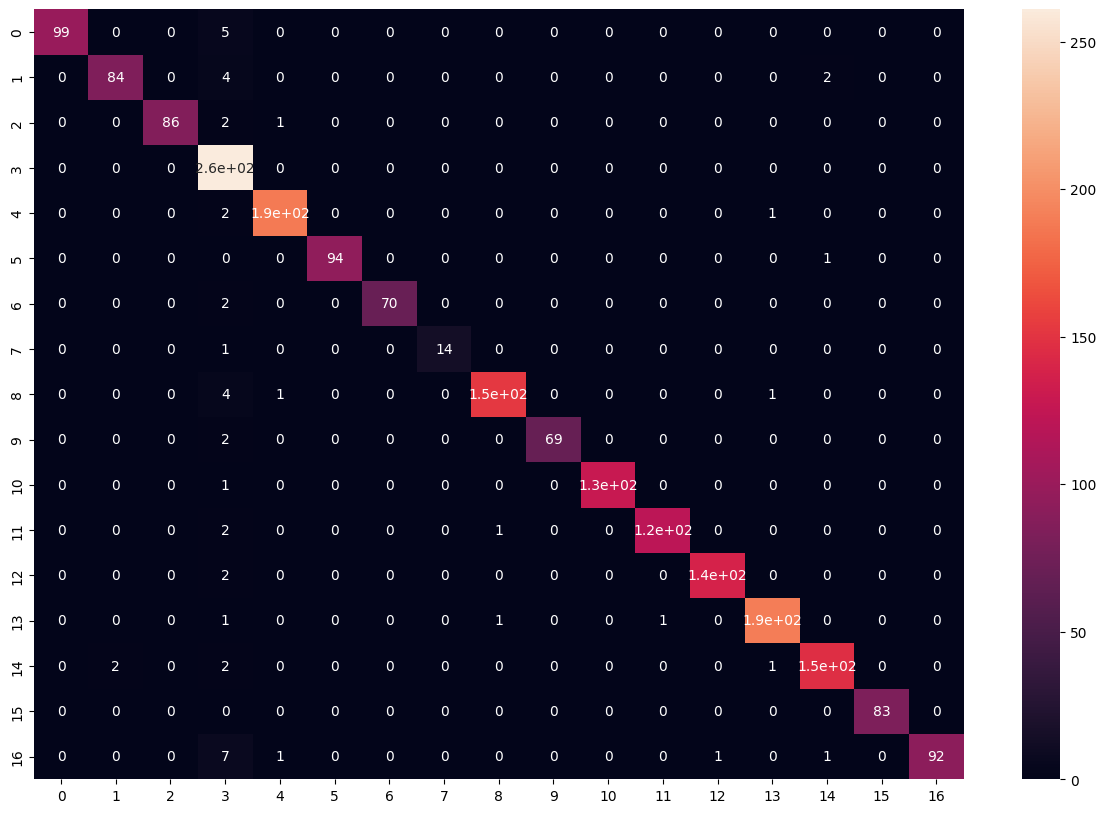

In [ ]:
# visualising the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
test = ["looky looky here"]
cv = CountVectorizer()
testX = cv.fit_transform(test).toarray()

In [ ]:
testX

array([[1, 2]])

In [ ]:
test_pred = model.predict(testX)

ValueError: ignored